In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


2.1.0


In [2]:
observations=1000

xs= np.random.uniform(low=-10, high= 10, size= (observations,1))
zs= np.random.uniform(-10,10, (observations,1))

g_inputs= np.column_stack((xs,zs))

noise= np.random.uniform(-1,1 , (observations,1))

g_targets= 2*xs - 3*zs + 5 + noise

np.savez ('Tflow', inputs=g_inputs, targets = g_targets)


In [3]:
train= np.load('Tflow.npz')

In [6]:
input_size= 2
output_size=1

model= tf.keras.Sequential([
    
                            tf.keras.layers.Dense(output_size
                            
                                                 )
                          ])
current=tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=current, loss= 'mean_squared_error')

model.fit(train['inputs'],train['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 21.4897
Epoch 2/100
1000/1000 - 0s - loss: 1.2720
Epoch 3/100
1000/1000 - 0s - loss: 0.4329
Epoch 4/100
1000/1000 - 0s - loss: 0.3523
Epoch 5/100
1000/1000 - 0s - loss: 0.4060
Epoch 6/100
1000/1000 - 0s - loss: 0.3605
Epoch 7/100
1000/1000 - 0s - loss: 0.3849
Epoch 8/100
1000/1000 - 0s - loss: 0.3825
Epoch 9/100
1000/1000 - 0s - loss: 0.3603
Epoch 10/100
1000/1000 - 0s - loss: 0.3716
Epoch 11/100
1000/1000 - 0s - loss: 0.3518
Epoch 12/100
1000/1000 - 0s - loss: 0.3648
Epoch 13/100
1000/1000 - 0s - loss: 0.3646
Epoch 14/100
1000/1000 - 0s - loss: 0.3695
Epoch 15/100
1000/1000 - 0s - loss: 0.3883
Epoch 16/100
1000/1000 - 0s - loss: 0.3728
Epoch 17/100
1000/1000 - 0s - loss: 0.3642
Epoch 18/100
1000/1000 - 0s - loss: 0.5180
Epoch 19/100
1000/1000 - 0s - loss: 0.3768
Epoch 20/100
1000/1000 - 0s - loss: 0.4013
Epoch 21/100
1000/1000 - 0s - loss: 0.3665
Epoch 22/100
1000/1000 - 0s - loss: 0.3916
Epoch 23/100
1000/1000 - 0s - loss: 0.36

# Extract the weights and biases

In [7]:
model.layers[0].get_weights()

[array([[ 2.0256743],
        [-2.9631035]], dtype=float32),
 array([4.990831], dtype=float32)]

# Extract the outputs

In [8]:
model.predict_on_batch(train['inputs'])

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[ 5.04351349e+01],
       [-3.21477318e+01],
       [ 3.65997429e+01],
       [-2.97867250e+00],
       [-2.73966999e+01],
       [ 1.44906092e+00],
       [ 1.54313488e+01],
       [ 4.94165001e+01],
       [ 3.51943321e+01],
       [ 2.29028378e+01],
       [-6.52232122e+00],
       [-1.77016144e+01],
       [-2.20302830e+01],
       [-3.63087416e+00],
       [-3.27229271e+01],
       [ 2.40084438e+01],
       [ 1.42931747e+01],
       [ 2.59616518e+00],
       [-6.85791922e+00],
       [-3.14761591e+00],
       [-2.12600861e+01],
       [-4.44045115e+00],
       [-2.50360050e+01],
       [-1.26497498e+01],
       [-7.92585135e+00],
       [ 2.53843861e+01],
       [-4.67869806e+00],
       [ 8.28074455e+00],
       [-1.52967033e+01],
       [ 5.14917831e+01],
       [-1.69482746e+01],
       [ 2.92639790e+01],
       [ 1.07134438e+01],
       [ 2.78946629e+01],
       [ 2.20489159e+01],
       [ 6.72364283e+00],
       [ 3.05

# Plotting with target data

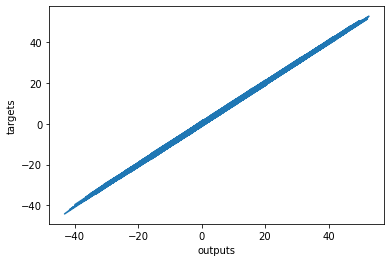

In [9]:
plt.plot(np.squeeze(model.predict_on_batch(train['inputs'])),np.squeeze(train['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()